# Lexicon score code based on BoE Wordlist

**Import the data**

In [3]:
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"/Users/kaferrante/Documents/Python/_Course4_Project/all_speeches.csv"
sentiment_path = r"/Users/kaferrante/Documents/Python/_Course4_Project/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


In [4]:
# Filter for speeches in year 1900
speeches_1900 = speeches_df[speeches_df['reference'] == 'r000101a_SRB']

# View the DataFrame
speeches_1900

,reference,country,date,title,author,is_gov,text
4010,r000101a_SRB,sweden,1900-01-01,Swedish economy in transition,backstrom,1,Thank you for inviting me to talk with you thi...


In [5]:
speeches_df = speeches_df.drop(4010)

In [6]:
# Create additional dataframe for the different sentiment score calcualtions
speeches_df_2 = speeches_df.copy()

## Option 1: Focus on negative & positive wordcounts only

**Text cleaned** by 
- Removing unwanted characters
- Converting text to lower case

**Sentiment score** is calculated as follows:
- positive and negative words in each speech are counted
- sentiment score = positive word count - negative word count

In [9]:
# 1. Import libraries
import pandas as pd
import re
from IPython.display import display

# 2. Load your datasets
# speeches_df = pd.read_csv('C:/Users/Srila/OneDrive/Documents/all_speeches.csv')
# sentiment_df = pd.read_excel('C:/Users/Srila/OneDrive/Documents/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx')

# 3. Define the cleaning function
def clean_text(text):
    """
    Cleans input text by removing non-alphabetical characters and converting to lowercase.

    Args:
        text (str): Raw text.

    Returns:
        str: Cleaned text.
    """
    text = re.sub(r'[^A-Za-z\s]', '', str(text))  # Remove non-letters
    text = text.lower()  # Lowercase
    return text

# 4. Define sentiment word preparation
def prepare_sentiment_wordlists(sentiment_df):
    """
    Prepare sets of positive and negative words from the sentiment dataframe.

    Args:
        sentiment_df (pd.DataFrame): Sentiment-labeled words.

    Returns:
        tuple: Positive words set, negative words set.
    """
    positive_words = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    negative_words = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return positive_words, negative_words

# 5. Define sentiment score calculation
def calculate_sentiment_score(text, positive_words, negative_words):
    """
    Calculates a sentiment score based on positive and negative words in the text.

    Args:
        text (str): Cleaned text.
        positive_words (set): Set of positive words.
        negative_words (set): Set of negative words.

    Returns:
        int: Sentiment score (positive count - negative count).
    """
    words = text.split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count - neg_count

# 6. Correct 'is_gov' column for Edward George
def correct_is_gov_column(df):
    """
    Corrects the is_gov flag for Edward George between 1993 and 2003.

    Args:
        df (pd.DataFrame): Speech dataframe.

    Returns:
        pd.DataFrame: Updated dataframe.
    """
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure dates are datetime
    mask = (df['author'].str.lower().str.contains('george')) & (df['date'].dt.year >= 1993) & (df['date'].dt.year <= 2003)
    df.loc[mask, 'is_gov'] = 'YES'
    return df

# 7. Start Cleaning and Calculating!

# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# Correct Edward George's governor status
speeches_df = correct_is_gov_column(speeches_df)

# Prepare sentiment wordlists
positive_words, negative_words = prepare_sentiment_wordlists(sentiment_df)

# Calculate sentiment scores
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda text: calculate_sentiment_score(text, positive_words, negative_words)
)

# Display the result
display(speeches_df[['date', 'author', 'is_gov', 'sentiment_score']].head())


/var/folders/r1/lqqrzjf91n342xkgb_sbt6rh0000gn/T/ipykernel_47263/640994244.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'YES' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'is_gov'] = 'YES'


,date,author,is_gov,sentiment_score
0,1990-11-28,fraser,0,-38
1,1991-10-03,fraser,0,-29
2,1992-03-14,fraser,0,22
3,1992-05-29,fraser,0,-11
4,1992-08-17,fraser,0,-12


**Same calculation - only difference is that results also display the negative and positive scores**

In [11]:
# Define sentiment score calculation (modified to get positive & negative counts separately)
def calculate_sentiment_scores(text, positive_words, negative_words):
    """
    Calculates positive and negative word counts in the text.
    """
    words = text.split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count, neg_count

# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# Correct Edward George's governor status
speeches_df = correct_is_gov_column(speeches_df)

# Prepare sentiment wordlists
positive_words, negative_words = prepare_sentiment_wordlists(sentiment_df)

# Calculate positive and negative sentiment scores and store in new columns
sentiment_counts = speeches_df['cleaned_text'].apply(
    lambda text: pd.Series(calculate_sentiment_scores(text, positive_words, negative_words))
)

# Assign positive and negative counts to separate columns
speeches_df['pos_count'] = sentiment_counts[0]
speeches_df['neg_count'] = sentiment_counts[1]

# Optional: define overall sentiment score as difference
speeches_df['sentiment_score'] = speeches_df['pos_count'] - speeches_df['neg_count']

# Display the results, including positive and negative scores
display(speeches_df[['date', 'author', 'is_gov', 'pos_count', 'neg_count', 'sentiment_score']].head())

,date,author,is_gov,pos_count,neg_count,sentiment_score
0,1990-11-28,fraser,0,55,93,-38
1,1991-10-03,fraser,0,29,58,-29
2,1992-03-14,fraser,0,67,45,22
3,1992-05-29,fraser,0,52,63,-11
4,1992-08-17,fraser,0,63,75,-12


In [12]:
speeches_df['year'] = pd.to_datetime(speeches_df.date).dt.year

In [13]:
speeches_yearly = speeches_df.groupby(['year'])[['sentiment_score']].mean().reset_index()

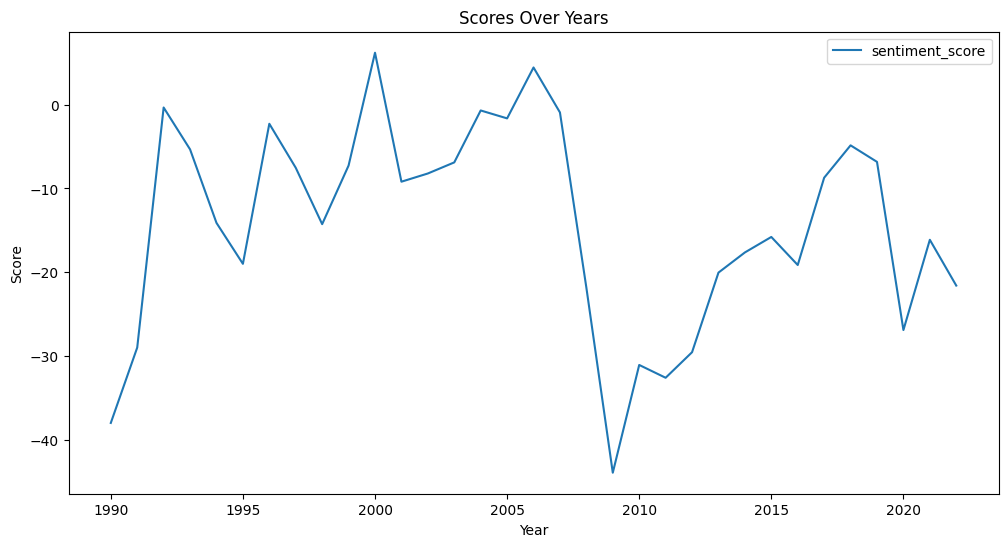

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# List your score columns
score_columns = ['sentiment_score']

for col in score_columns:
    plt.plot(speeches_yearly['year'], speeches_yearly[col], label=col)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Scores Over Years')
plt.legend()
plt.show()

## Option 2: Focus on negative & positive wordcounts & divide by the wordcount of the speech

**Text cleaned** by
- Removing unwanted characters
- Removing any special characters and punctuation
- Converting text to lower case
- Removing stopwords
- tokenisation: Split the cleaned text into individual words, so that text can be analysed at word level.
- Lemmatisation: Reduce words to its base or dictionary form (the lemma).

**Sentiment score** is calculated as follows:
- positive and negative words in each speech are counted
- sentiment score = psotive word count - negative word count /  wordcount

**Text cleaning functions**

In [19]:
speeches_df_2

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [20]:
from collections import defaultdict                     # Creating dictionaries that return default value for nonexistent keys.
from nltk.corpus import wordnet as wn                   # Lexical database for retrieving word relationships & meanings.
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Reducing words to base or root form.
import contractions                                     # Expanding/contracting text contractions.
from nltk.corpus import stopwords                       # Providing list of common words to exclude from analysis.
from nltk import word_tokenize, pos_tag                 # Splitting text into words and tags with part of speech
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Reducing words to base or root form.

In [21]:
# Preprocessing function
def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions i.e I'm not good goes to I am not good
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub('#', '', text)         # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = text.lower()                  # Convert to lowercase
    #Below is to create a set of stop words from the NLTK library's predefined list but not is excluded.
    stop_words = set(stopwords.words('english')) - {'not'} 
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [22]:
# Define the tag map for POS tagging.
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Lemmatise the tokens with correct POS tags.
lemma_function = WordNetLemmatizer()

# Lemmatisation function.
def lemmatize_tokens(tokens):
    #For each word in the token list, it lemmatizes the word with the correct part-of-speech
    lemmatized_tokens = [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)]
    return lemmatized_tokens

**Apply text cleaning functions**

In [24]:
# Apply the cleaning function
speeches_df_2['text_cleaned'] = speeches_df_2['text'].apply(preprocess_text)

In [25]:
# Apply the cleaning function
speeches_df_2['text_tokenised'] = speeches_df_2['text_cleaned'].apply(word_tokenize)

In [26]:
# Apply the cleaning function
speeches_df_2['text_lemmatised'] = speeches_df_2['text_tokenised'].apply(lemmatize_tokens)

In [27]:
# Convert list of words into a string
speeches_df_2['text_lemmatised_str'] = speeches_df_2['text_lemmatised'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [28]:
# Count the number of words in lemmatised text
speeches_df_2['word_count'] = speeches_df_2['text_lemmatised_str'].str.split().apply(len)

**Observation**: do we need to count the words of the uncleaned text or the lemmatised text?

In [30]:
# View the Dataframe
speeches_df_2.head()

,reference,country,date,title,author,is_gov,text,text_cleaned,text_tokenised,text_lemmatised,text_lemmatised_str,word_count
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"[would, doubt, argue, two, objectives, like, t...","[would, doubt, argue, two, objective, like, tr...",would doubt argue two objective like try cake ...,1919
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"[today, wish, talk, real, interest, rates, mai...","[today, wish, talk, real, interest, rate, main...",today wish talk real interest rate mainly hist...,1754
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"[welcome, opportunity, talk, prospects, banks,...","[welcome, opportunity, talk, prospect, bank, a...",welcome opportunity talk prospect bank austral...,1867
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"[pleasure, opportunity, address, influential, ...","[pleasure, opportunity, address, influential, ...",pleasure opportunity address influential gathe...,2123
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",long time fan sanders delighted participating ...,"[long, time, fan, sanders, delighted, particip...","[long, time, fan, sander, delight, participate...",long time fan sander delight participate tribu...,2150


**Calculating sentiment score with BoE Wordlist**

In [32]:
# Prepare the lexicon
sentiment_lexicon = sentiment_df.copy()

# Define categories
categories = [
     'Negative',
     'Positive',
     'Uncertainty',
     'Litigious',
     'Strong',
     'Weak',
     'Constraining',
 ]

# Create dictionary of categories, containing words that belong to that category based on your sentiment lexicon.
word_sets = {
    cat: set(sentiment_lexicon.loc[sentiment_lexicon[cat] == 1, 'Word'].str.lower())
    for cat in categories
}

In [33]:
# Define function to apply the lexicon to the text
def lexicon_counts(tokens):
    return pd.Series({
        cat: sum(t in word_sets[cat] for t in tokens)
        for cat in categories
    })

# Compute counts and add new columns for each category
speeches_df_2 = pd.concat(
    [speeches_df_2, speeches_df_2['text_lemmatised'].apply(lexicon_counts)], axis=1
 )

In [34]:
# Calculate the sentiment score by subtracting the negative score from the positive score
speeches_df_2['sentiment_score_lexicon_simple'] = (speeches_df_2['Positive'] - speeches_df_2['Negative'])

In [35]:
# Calculate the sentiment score by subtracting the negative score from the positive score
# abd dividing by the total number of words in the lemmatised text
speeches_df_2['sentiment_score_lexicon'] = (speeches_df_2['Positive'] - speeches_df_2['Negative'])/ speeches_df_2['word_count']

In [36]:
# View the dataframe
speeches_df_2.head()

,reference,country,date,title,author,is_gov,text,text_cleaned,text_tokenised,text_lemmatised,...,word_count,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining,sentiment_score_lexicon_simple,sentiment_score_lexicon
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"[would, doubt, argue, two, objectives, like, t...","[would, doubt, argue, two, objective, like, tr...",...,1919,84,58,32,5,10,15,13,-26,-0.013549
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"[today, wish, talk, real, interest, rates, mai...","[today, wish, talk, real, interest, rate, main...",...,1754,53,28,35,2,3,16,12,-25,-0.014253
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"[welcome, opportunity, talk, prospects, banks,...","[welcome, opportunity, talk, prospect, bank, a...",...,1867,43,67,33,8,11,16,13,24,0.012855
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"[pleasure, opportunity, address, influential, ...","[pleasure, opportunity, address, influential, ...",...,2123,62,56,43,6,7,20,8,-6,-0.002826
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",long time fan sanders delighted participating ...,"[long, time, fan, sanders, delighted, particip...","[long, time, fan, sander, delight, participate...",...,2150,72,62,42,6,12,27,13,-10,-0.004651


## Option 3: Calculate weighted sentiment score using all categories & divide by the wordcount

**Text cleaned** as in option 2

**Sentiment score** is calculated as follows:
- words in all categories in each speech are counted (positive, negative, uncertainty, litigious, strong, weak, constraining)
- weights are applied to each category to show how important the influence on the sentiment is
- sentiment score = category counts * category weights / wordcount

In [40]:
# Calculate the number of words found in each category in all the speeches
category_sums = speeches_df_2[['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak']].sum()

# Sort the sums in descending order
category_sums_sorted = category_sums.sort_values(ascending=False)

# View the results
category_sums_sorted

Negative       527121
Positive       426490
Uncertainty    350106
Weak           146381
Litigious       85497
Strong          41241
dtype: int64

In [41]:
# Bank oF England (united kingdom) speeches only  
boe_speeches = speeches_df_2[speeches_df_2['country'].str.lower() == 'united kingdom'].copy()

In [ ]:
# Calculate the number of words found in each category in all the speeches
category_sums_boe = boe_speeches[['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak']].sum()

# Sort the sums in descending order
category_sums_boe_sorted = category_sums_boe.sort_values(ascending=False)

# View the results
category_sums_boe_sorted

Negative       116182
Uncertainty     89901
Positive        76124
Weak            38845
Litigious       19064
Strong           7764
dtype: int64

**Observations All Speeches**:
- negative, positive & uncertainty have the biggest impact on the weighted score (33%, 27% and 22% respectively)
- weak, litigious and strong have limited score (9%, 5% and 3% respectively

**Observations BoE Speeches only**:
- negative, uncertainty & positive have the biggest impact on the weighted score (33%, 26% and 22% respectively)<br>
**Note**: Uncertainty has higher impact than positive
- weak, litigious and strong have limited score (11%, 5% and 2% respectively

**Category weights** based on importance:<br>
This is one weighting proposal - **of course different weights can be applied**
- Negative -1       Standard negative words
- Positive +1.5     Standard positive words - compensate for negatively skewed wordlist
- Uncertainty 0.2   Words expressing doubt or ambiguity, less impactful than outright negative or positive words
- Litigious -0.2    Words related to lawsuits or legal issues, potentially negative or impactful depending on context
- Strong +1.5       Words with high intensity or impact, thus given more weight
- Weak +0.5         Words with less impact, so given lesser weight than 'Strong' words
- Constraining -0.5 Words implying restriction or limitations, generally negative

In [ ]:
# Assign weights to the categories
category_weights = {
    'Negative': -1,
    'Positive': 1.5,
    'Uncertainty': 0.2,
    'Litigious': -0.2,
    'Strong': 1.5,
    'Weak': 0.5,
    'Constraining': -0.5
}

In [ ]:
# Define function to apply the lexicon to the text
def lexicon_score_weighted(tokens):
    score = 0
    for cat in categories:
        count = sum(t in word_sets[cat] for t in tokens)
        score += count * category_weights[cat]
    return score

# Compute counts and store as a new column
speeches_df_2['sentiment_score_lexicon_weighted'] = speeches_df_2['text_lemmatised'].apply(lexicon_score_weighted) \
                                                    / speeches_df_2['word_count']

# View the DataFrame
speeches_df_2.head()

,reference,country,date,title,author,is_gov,text,text_cleaned,text_tokenised,text_lemmatised,...,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining,sentiment_score_lexicon_simple,sentiment_score_lexicon,sentiment_score_lexicon_weighted
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"[would, doubt, argue, two, objectives, like, t...","[would, doubt, argue, two, objective, like, tr...",...,84,58,32,5,10,15,13,-26,-0.013549,0.012715
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"[today, wish, talk, real, interest, rates, mai...","[today, wish, talk, real, interest, rate, main...",...,53,28,35,2,3,16,12,-25,-0.014253,0.001197
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"[welcome, opportunity, talk, prospects, banks,...","[welcome, opportunity, talk, prospect, bank, a...",...,43,67,33,8,11,16,13,24,0.012855,0.043117
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"[pleasure, opportunity, address, influential, ...","[pleasure, opportunity, address, influential, ...",...,62,56,43,6,7,20,8,-6,-0.002826,0.021620
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",long time fan sanders delighted participating ...,"[long, time, fan, sanders, delighted, particip...","[long, time, fan, sander, delight, participate...",...,72,62,42,6,12,27,13,-10,-0.004651,0.024744


In [ ]:
speeches_df_2['year'] = pd.to_datetime(speeches_df_2.date).dt.year

In [ ]:
speeches_yearly_2 = speeches_df_2.groupby(['year'])[['sentiment_score_lexicon_simple', 'sentiment_score_lexicon', 'sentiment_score_lexicon_weighted']].mean().reset_index()

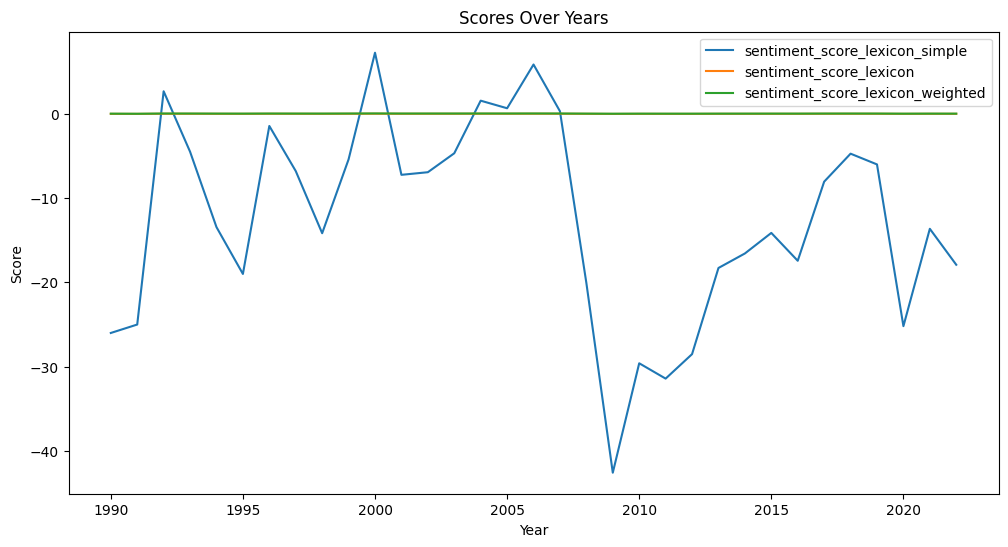

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# List your score columns
score_columns = ['sentiment_score_lexicon_simple', 'sentiment_score_lexicon', 'sentiment_score_lexicon_weighted']

for col in score_columns:
    plt.plot(speeches_yearly_2['year'], speeches_yearly_2[col], label=col)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Scores Over Years')
plt.legend()
plt.show()

## Conclusion

**1. Text Cleaning - which steps of text cleaning need to be taken to get the best results?**

- Removing unwanted characters
- Removing any special characters and punctuation
- Converting text to lower case
- Removing stopwords
- tokenisation: Split the cleaned text into individual words, so that text can be analysed at word level.
- Lemmatisation: Reduce words to its base or dictionary form (the lemma).

**2. Sentiment Score - how do we want to calculate the sentiment score?**
- Option 1: sentiment score = positive word count - negative word count
- Option 2: sentiment score = (positive word count - negative word count) / speech word count
- Option 3: sentiment score = (sum of (category word counts * category weights)) / speech word count  => weights to be defined